In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# 1. INTRODUCTION

## 1.1 Data Dictionary

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

## 1.2 Task

To perform EDA and predict if a person is prone to a heart attack or not.

# 2. PREPARATION

# 2.1 Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2.2 Data

In [3]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

## 2.3 Urderstanding Data

### 2.3.1 The shape of the data

In [4]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (303, 14)


### 2.3.2 Preview of the first 5 row of the data

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.3.3 Checking the number of unique values in each column

In [6]:
dict = {}

for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
    
pd.DataFrame(dict, index=['Unique Count']).transpose()

,Unique Count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


### 2.3.4 Separating the columns in categorical and continuous

In [7]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The catagorial cols are: ", cat_cols)
print("The continuous cols are: ", con_cols)
print("The target variable is: ", target_col)

The catagorial cols are:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is:  ['output']


2.3.5 Summary Statistics

In [8]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


2.3.5 Missing Values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# 3. EXPLORATORY DATA ANALYSIS

## 3.1 Univariate Analysis

### 3.1 Count Plot of Categorical Features

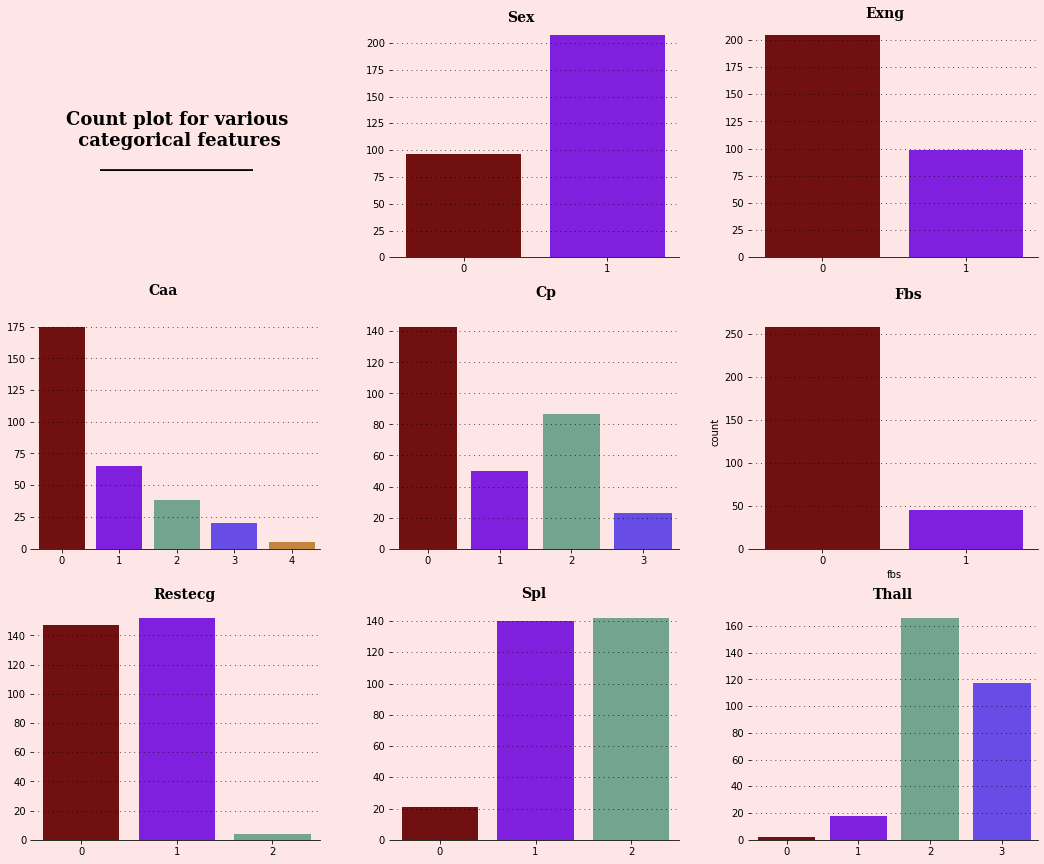

In [41]:
# Grid
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.25, hspace=0.25)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

# Colors
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)

# Background of the plot
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex Count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='sex', palette=color_palette)
ax1.set_xlabel('')
ax1.set_ylabel('')

# Exng Count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax2, data=df, x='exng', palette=color_palette)
ax2.set_xlabel('')
ax2.set_ylabel('')

# Caa Count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight="bold", fontfamily='serif', color='#000000')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax3, data=df, x='caa', palette=color_palette)
ax3.set_xlabel('')
ax3.set_ylabel('')

# Cp Count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax4, data=df, x='cp', palette=color_palette)
ax4.set_xlabel('')
ax4.set_ylabel('')

# Fbs Count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax5, data=df, x='fbs', palette=color_palette)
ax5.set_xlabel=('')
ax5.set_ylabel=('')

# Restecg Count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax6, data=df, x='restecg', palette=color_palette)
ax6.set_xlabel('')
ax6.set_ylabel('')

# Slp Count
ax7.text(0.85, 155, 'Spl', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax7, data=df, x='slp', palette=color_palette)
ax7.set_xlabel('')
ax7.set_ylabel('')

# Thall Count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(ax=ax8, data=df, x='thall', palette=color_palette)
ax8.set_xlabel('')
ax8.set_ylabel('')

# Without Frame
for s in ['top', 'right', 'left']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

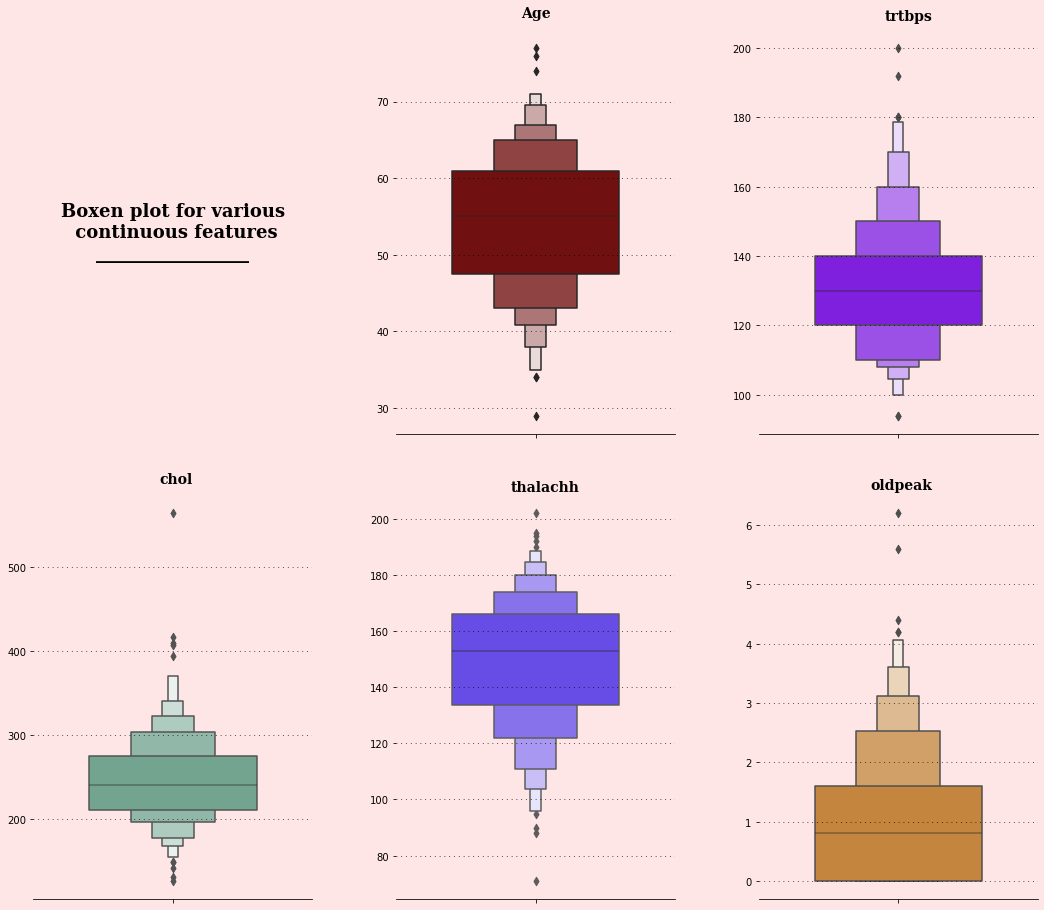

In [57]:
# Grid
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# Colors
background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)

# Title of the plot
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.boxenplot(ax=ax1, y=df['age'], palette=['#800000'], width=0.6)
ax1.set_xlabel('')
ax1.set_ylabel('')

# trtbps
ax2.text(-0.05, 208, 'trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.boxenplot(ax=ax2, y=df['trtbps'], palette=['#8000ff'], width=0.6)
ax2.set_xlabel('')
ax2.set_ylabel('')

# chol
ax3.text(-0.05, 600, 'chol', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.boxenplot(ax=ax3, y=df['chol'], palette=['#6aac90'], width=0.6)
ax3.set_xlabel('')
ax3.set_ylabel('')

# thalachh
ax4.text(-0.09, 210, 'thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.boxenplot(ax=ax4, y=df['thalachh'], palette=['#5833ff'], width=0.6)
ax4.set_xlabel('')
ax4.set_ylabel('')

# oldpeak
ax5.text(-0.1, 6.6, 'oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color='#000000')
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.boxenplot(ax=ax5, y=df['oldpeak'], palette=['#da8829'], width=0.6)
ax5.set_xlabel('')
ax5.set_ylabel('')

for s in ['top', 'right', 'left']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

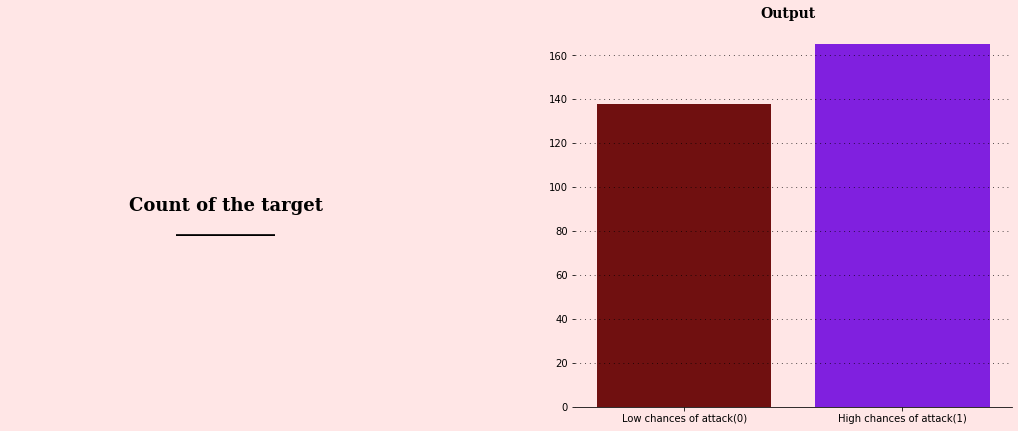

In [60]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)